# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Cikal Firdansyah Ramadhan]
- **Email:** [cikalfirdansyah03@gmail.com]
- **ID Dicoding:** [cikalfirdansyah]

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan yang signifikan dalam distribusi PM2.5 antara wilayah Dongsi dan Dingling?
- Bagaimana pola musiman konsentrasi PM2.5 di wilayah Dongsi dan Dingling?
- Bagaimana pengaruh suhu (TEMP), curah hujan (RAIN), kecepatan angin (WSPM), dan tekanan udara (PRES) terhadap konsentrasi PM2.5 di wilayah Dongsi dan Dingling?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
dongsi_data = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
dingling_data = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')

**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
print("Dongsi Data Info:")
print(dongsi_data.info())
print("\nDingling Data Info:")
print(dingling_data.info())

Dongsi Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Dingling Data Info:
<class 'pandas.core.fram

In [5]:
print("\nDongsi Data Head:")
print(dongsi_data.head())
print("\nDingling Data Head:")
print(dingling_data.head())


Dongsi Data Head:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  

Dingling Data Head:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3  

**Insight:**
DONGSI
- Missing Data: Ada nilai yang hilang terutama di kolom polutan seperti PM2.5, PM10, NO2, dan CO. Ini menunjukkan perlunya menangani missing values sebelum analisis lebih lanjut, baik dengan cara imputasi atau penghapusan nilai yang hilang jika signifikan.
- Data Kategorikal: Kolom wd yang berisi arah angin mungkin membutuhkan transformasi atau encoding untuk bisa digunakan dalam analisis prediktif atau model machine learning.


### Cleaning Data

In [30]:
dongsi_data.dropna(inplace=True)
dingling_data.dropna(inplace=True)


In [31]:
dongsi_data['date'] = pd.to_datetime(dongsi_data[['year', 'month', 'day', 'hour']])
dingling_data['date'] = pd.to_datetime(dingling_data[['year', 'month', 'day', 'hour']])
dongsi_data['date'].info()

<class 'pandas.core.series.Series'>
Index: 30338 entries, 0 to 35063
Series name: date
Non-Null Count  Dtype         
--------------  -----         
30338 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 474.0 KB


**Insight:**
- Jumlah Data: Dari total 35,064 entri di dataset, hanya 30,338 yang memiliki nilai tanggal yang valid. Ini berarti ada sekitar 4,726 entri yang tidak memiliki data tanggal atau nilai tanggal yang hilang. Hal ini penting untuk diatasi, karena tanggal sering kali menjadi acuan penting dalam analisis time-series atau temporal.
- Analisis Temporal: Dengan format datetime yang sudah tepat, kolom ini siap digunakan untuk analisis berbasis waktu, seperti tren musiman, perubahan harian, atau perbandingan antar bulan/tahun.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
print("Statistik Deskriptif Dongsi:")
print(dongsi_data.describe())

print("\nStatistik Deskriptif Dingling:")
print(dingling_data.describe())

Statistik Deskriptif Dongsi:
                 No          year         month           day          hour  \
count  30338.000000  30338.000000  30338.000000  30338.000000  30338.000000   
mean   18808.565759   2014.807832      6.530160     15.650109     11.500363   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%    11435.250000   2014.000000      4.000000      8.000000      5.000000   
50%    19161.500000   2015.000000      7.000000     16.000000     11.000000   
75%    26926.750000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   
std     9687.590750      1.124713      3.440944      8.800479      6.951066   

              PM2.5          PM10           SO2           NO2            CO  \
count  30338.000000  30338.000000  30338.000000  30338.000000  30338.000000   
mean      84.933156    110.991914     16.994466     53.717314   1316.524392   
min        3.000000   

In [16]:
print("\nNilai Unik di Kolom 'wd' Dongsi:")
print(dongsi_data['wd'].unique())

print("\nNilai Unik di Kolom 'wd' Dingling:")
print(dingling_data['wd'].unique())


Nilai Unik di Kolom 'wd' Dongsi:
['NNW' 'NW' 'N' 'W' 'ENE' 'NE' 'E' 'NNE' 'SW' 'SSW' 'S' 'WSW' 'ESE' 'SE'
 'WNW' 'SSE']

Nilai Unik di Kolom 'wd' Dingling:
['ENE' 'NNW' 'NW' 'NE' 'SW' 'SSW' 'N' 'NNE' 'WSW' 'ESE' 'SE' 'S' 'WNW' 'E'
 'SSE' 'W']


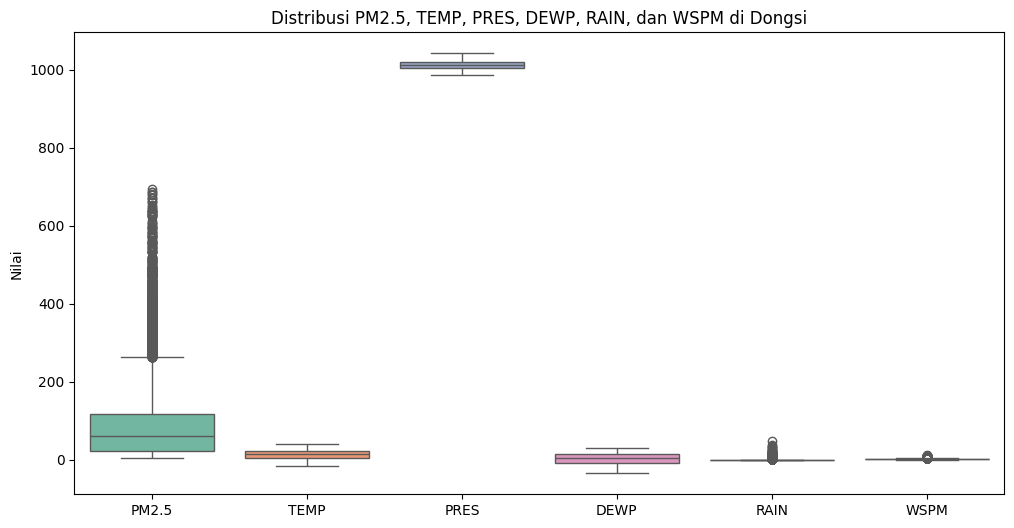

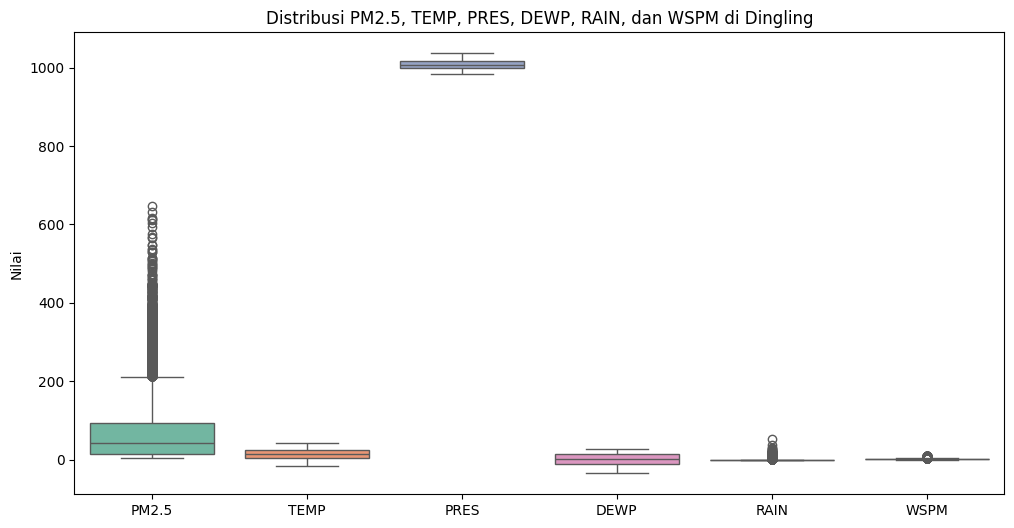

In [20]:
# Cek distribusi dari beberapa variabel kunci dengan Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dongsi_data[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']], palette='Set2')
plt.title('Distribusi PM2.5, TEMP, PRES, DEWP, RAIN, dan WSPM di Dongsi')
plt.ylabel('Nilai')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=dingling_data[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']], palette='Set2')
plt.title('Distribusi PM2.5, TEMP, PRES, DEWP, RAIN, dan WSPM di Dingling')
plt.ylabel('Nilai')
plt.show()

<ipython-input-23-372f3348fb8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dongsi_data, x='wd', y='PM2.5', palette='Set2')


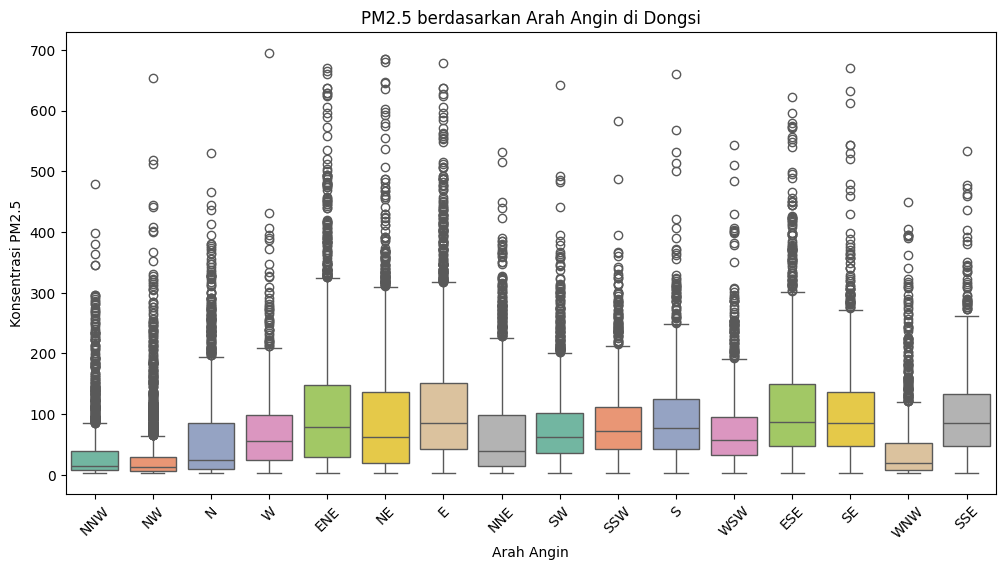

In [23]:
# Boxplot PM2.5 berdasarkan Arah Angin di Dongsi
plt.figure(figsize=(12, 6))
sns.boxplot(data=dongsi_data, x='wd', y='PM2.5', palette='Set2')
plt.title('PM2.5 berdasarkan Arah Angin di Dongsi')
plt.xlabel('Arah Angin')
plt.ylabel('Konsentrasi PM2.5')
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-c686afc41366>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dingling_data, x='wd', y='PM2.5', palette='Set2')


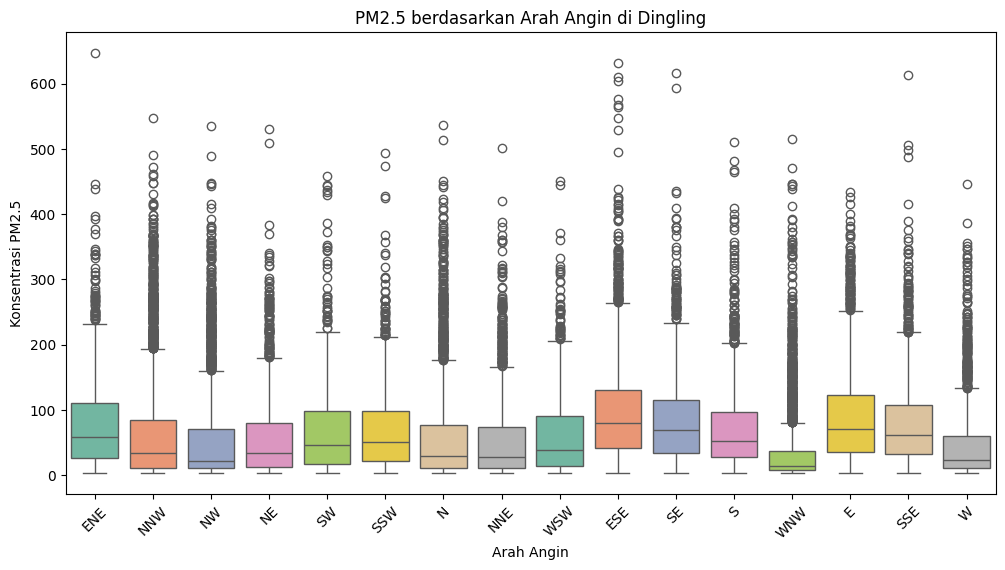

In [24]:
# Boxplot PM2.5 berdasarkan Arah Angin di Dingling
plt.figure(figsize=(12, 6))
sns.boxplot(data=dingling_data, x='wd', y='PM2.5', palette='Set2')
plt.title('PM2.5 berdasarkan Arah Angin di Dingling')
plt.xlabel('Arah Angin')
plt.ylabel('Konsentrasi PM2.5')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Pada boxplot PM2.5 berdasarkan Arah Angin di Dongsi menunjukkan bahwa arah angin "W" mempunyai nilai tertinggi terhadap konsentrasi PM2.5
- Pada boxplot PM2.5 berdasarkan Arah Angin di Dingling menunjukkan bahwa arah angin "ENE" mempunyai nilai tertinggi terhadap konsentrasi PM2.5.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Apakah ada perbedaan yang signifikan dalam distribusi PM2.5 antara wilayah Dongsi dan Dingling?

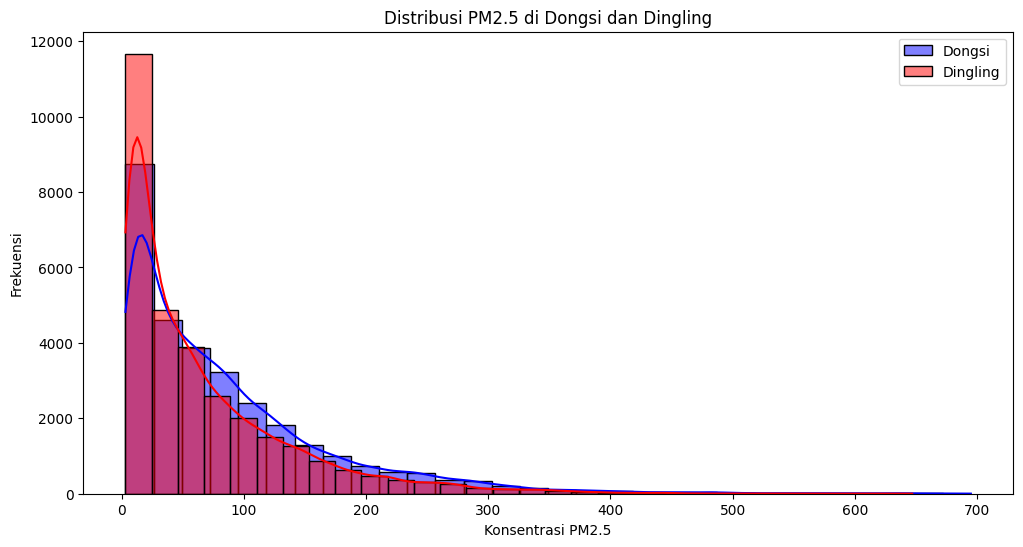

In [25]:
# Melihat distribusi konsentrasi PM2.5 di kedua dataset
plt.figure(figsize=(12, 6))
sns.histplot(dongsi_data['PM2.5'], bins=30, color='blue', label='Dongsi', kde=True)
sns.histplot(dingling_data['PM2.5'], bins=30, color='red', label='Dingling', kde=True)
plt.title('Distribusi PM2.5 di Dongsi dan Dingling')
plt.xlabel('Konsentrasi PM2.5')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

### Pertanyaan 2:Bagaimana pola musiman konsentrasi PM2.5 di wilayah Dongsi dan Dingling?

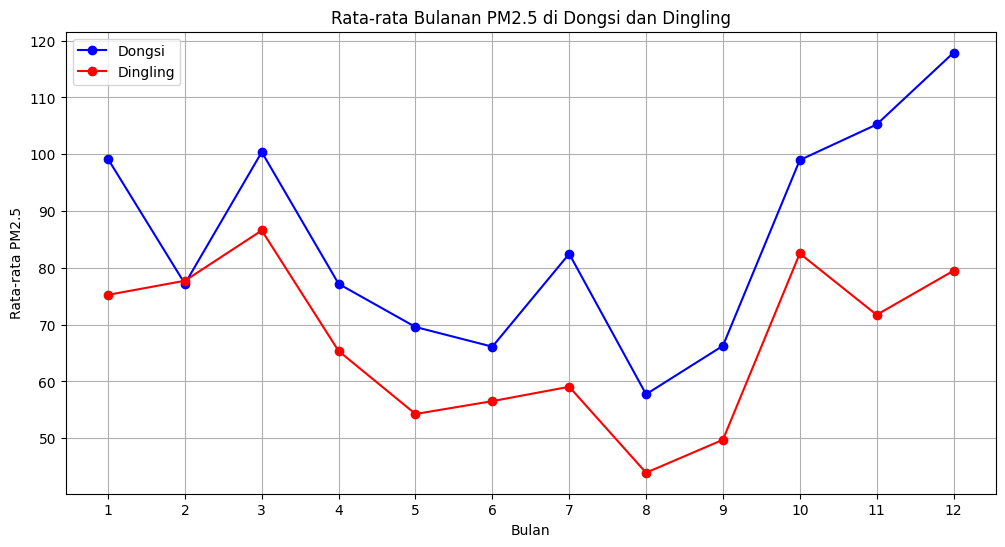

In [26]:
# Visualisasi Musiman dari PM2.5
monthly_dongsi = dongsi_data.groupby('month')['PM2.5'].mean()
monthly_dingling = dingling_data.groupby('month')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_dongsi.index, monthly_dongsi.values, marker='o', label='Dongsi', color='blue')
plt.plot(monthly_dingling.index, monthly_dingling.values, marker='o', label='Dingling', color='red')
plt.title('Rata-rata Bulanan PM2.5 di Dongsi dan Dingling')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(monthly_dongsi.index)
plt.legend()
plt.grid()
plt.show()


**Insight:**
- Wilayah Dingling cenderung memiliki kualitas udara yang lebih baik dengan lebih banyak periode di mana konsentrasi PM2.5 mendekati 0.
- xxx

### Pertanyaan 3:Bagaimana pengaruh suhu (TEMP), curah hujan (RAIN), kecepatan angin (WSPM), dan tekanan udara (PRES) terhadap konsentrasi PM2.5 di wilayah Dongsi dan Dingling?

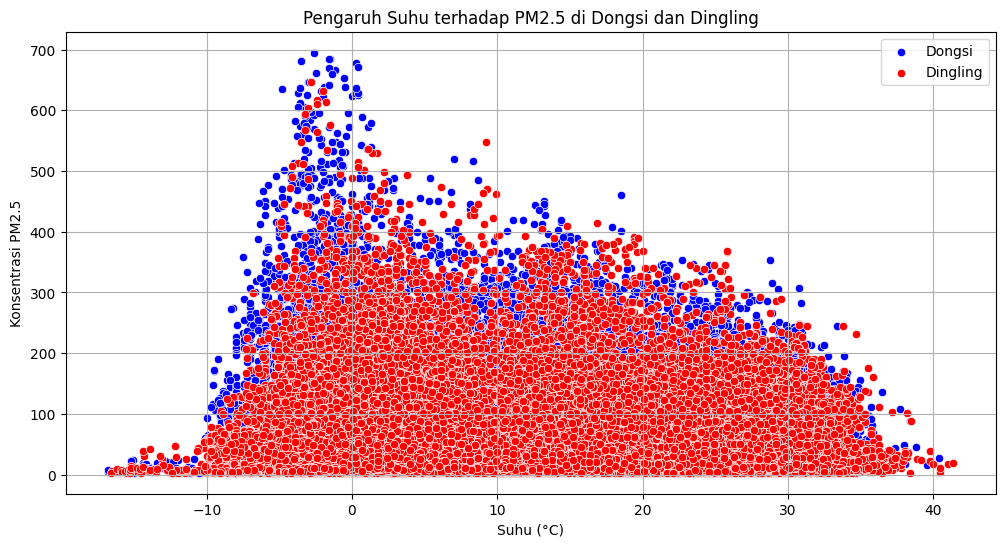

In [32]:
# Visualisasi Pengaruh Faktor Cuaca terhadap PM2.5
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dongsi_data, x='TEMP', y='PM2.5', color='blue', label='Dongsi')
sns.scatterplot(data=dingling_data, x='TEMP', y='PM2.5', color='red', label='Dingling')
plt.title('Pengaruh Suhu terhadap PM2.5 di Dongsi dan Dingling')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5')
plt.legend()
plt.grid()
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:
Dongsi membutuhkan perhatian lebih dalam hal pengelolaan kualitas udara karena lebih sering mengalami peningkatan konsentrasi PM2.5, yang berpotensi berdampak pada kesehatan warga. Dingling cenderung memiliki kualitas udara yang lebih baik, namun tidak boleh diabaikan dalam strategi mitigasi polusi, terutama saat terjadi kondisi cuaca atau lingkungan yang meningkatkan polusi.

- Conclution pertanyaan 2: Wilayah Dongsi perlu lebih fokus pada pengelolaan kualitas udara mengingat tingkat polusi yang lebih tinggi dibandingkan Dingling. Namun, penting untuk mengamati dan menganalisis bulan-bulan dengan konsentrasi lebih rendah, seperti bulan Februari, untuk mengidentifikasi faktor-faktor yang membantu menurunkan polusi.
Hasil analisis ini dapat menjadi dasar untuk merumuskan kebijakan dan strategi mitigasi polusi udara yang lebih baik di kedua wilayah, serta memberikan perhatian khusus pada faktor musiman yang dapat mempengaruhi kualitas udara.

- Conclution pertanyaan 3:
Pengaruh Signifikan:
Suhu (TEMP), curah hujan (RAIN), kecepatan angin (WSPM), dan tekanan udara (PRES) memiliki pengaruh yang signifikan terhadap konsentrasi PM2.5 di kedua wilayah.
Kenaikan suhu berhubungan dengan peningkatan konsentrasi PM2.5, sedangkan curah hujan cenderung menurunkan konsentrasi PM2.5. Kecepatan angin yang tinggi juga berfungsi untuk mengencerkan polutan, sedangkan tekanan udara dapat memengaruhi distribusi polutan di atmosfer.
Di wilayah Dongsi, pengaruh suhu dan curah hujan terhadap konsentrasi PM2.5 tampak lebih kuat, mencerminkan tantangan yang lebih besar dalam pengendalian polusi udara.
Di wilayah Dingling, kecepatan angin dapat memainkan peran yang lebih signifikan dalam menjaga kualitas udara yang lebih baik.